# New York City

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [70]:
# Reading merged bike datas for 2018
chicago_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/nyc_merged_2018.csv")
# dc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/dc_merged_2018.csv")
# nyc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/nyc_merged_2018.csv")

In [71]:
chicago_2018.head()

,start_date,start_hour_range,start_station_name,trip_count,trip_duration_avg,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,1am-6am,1 Ave & E 110 St,1,459,13,19,8,0.0,17.0,0.0
1,01/01/2018,1am-6am,1 Ave & E 16 St,9,228,13,19,8,0.0,17.0,0.0
2,01/01/2018,1am-6am,1 Ave & E 18 St,2,555,13,19,8,0.0,17.0,0.0
3,01/01/2018,1am-6am,1 Ave & E 30 St,1,800,13,19,8,0.0,17.0,0.0
4,01/01/2018,1am-6am,1 Ave & E 62 St,1,737,13,19,8,0.0,17.0,0.0


In [72]:
chicago_2018_gb = chicago_2018.groupby(["start_date"])
chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "TMAX": "mean",
                                       "TMIN": "mean", "PRCP": "mean", "AWND": "mean", "SNWD": "mean"}) 
chicago_2018_agg.reset_index(level=["start_date"], inplace=True)
chicago_2018_agg.head()

,start_date,trip_count,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,5500,13,19,8,0.00,17.00,0.0
1,01/02/2018,18818,18,26,14,0.00,13.87,0.0
2,01/03/2018,24299,23,30,17,0.00,6.93,0.0
3,01/04/2018,1922,26,29,20,0.51,24.83,1.2
4,01/05/2018,4972,17,20,10,0.00,24.83,7.1


In [73]:
chicago_2018_m = chicago_2018_agg.drop(["start_date", "trip_count"], axis=1)
chicago_2018_m.head()

,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,13,19,8,0.00,17.00,0.0
1,18,26,14,0.00,13.87,0.0
2,23,30,17,0.00,6.93,0.0
3,26,29,20,0.51,24.83,1.2
4,17,20,10,0.00,24.83,7.1


In [74]:
chicago_2018_X = pd.get_dummies(chicago_2018_m)
chicago_2018_X.columns

Index(['TAVG', 'TMAX', 'TMIN', 'PRCP', 'AWND', 'SNWD'], dtype='object')

In [75]:
chicago_2018_X.head()

,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,13,19,8,0.00,17.00,0.0
1,18,26,14,0.00,13.87,0.0
2,23,30,17,0.00,6.93,0.0
3,26,29,20,0.51,24.83,1.2
4,17,20,10,0.00,24.83,7.1


In [76]:
chicago_2018_Y = chicago_2018_agg["trip_count"].values.reshape(-1, 1)

In [77]:
print(chicago_2018_X.shape, chicago_2018_Y.shape)

(365, 6) (365, 1)


In [78]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(chicago_2018_X, chicago_2018_Y, random_state=42)
                                                                #, train_size=0.7)


In [79]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler_chicago = StandardScaler().fit(X_train_ch)
y_scaler_chicago = StandardScaler().fit(y_train_ch)

In [80]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled_ch =  X_scaler_chicago.transform(X_train_ch)
X_test_scaled_ch = X_scaler_chicago.transform(X_test_ch)
y_train_scaled_ch = y_scaler_chicago.transform(y_train_ch)
y_test_scaled_ch = y_scaler_chicago.transform(y_test_ch)

In [81]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression

model_ch = LinearRegression()
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

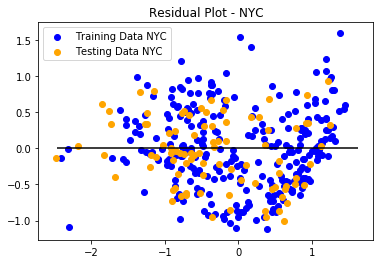

In [82]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions_ch = model_ch.predict(X_test_scaled_ch)
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

plt.scatter(model_ch.predict(X_train_scaled_ch), model_ch.predict(X_train_scaled_ch) - y_train_scaled_ch, c="blue", label="Training Data NYC")
plt.scatter(model_ch.predict(X_test_scaled_ch), model_ch.predict(X_test_scaled_ch) - y_test_scaled_ch, c="orange", label="Testing Data NYC")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_ch.min(), xmax=y_test_scaled_ch.max())
plt.title("Residual Plot - NYC")

plt.savefig("residual_nyc.png", bbox_inches="tight")

In [83]:
print('Weight coefficients: ', model_ch.coef_)
print('y-axis intercept: ', model_ch.intercept_) 

Weight coefficients:  [[-0.03827018  0.50954032  0.28990842 -0.31609163 -0.0025463  -0.07375535]]
y-axis intercept:  [-4.81901185e-17]


In [84]:
print(f"True output: {y_test_scaled_ch[11]}")
print(f"Predicted output: {predictions_ch[11]}")
print(f"Prediction Error: {predictions_ch[11] - y_test_scaled_ch[11]}")
print(f"Prediction Error %: {(predictions_ch[11] - y_test_scaled_ch[11]) / y_test_scaled_ch[11] * 100}")

True output: [-0.92617018]
Predicted output: [-0.91891741]
Prediction Error: [0.00725277]
Prediction Error %: [-0.78309252]


In [85]:
print(f"True output: {y_test_scaled_ch[42]}")
print(f"Predicted output: {predictions_ch[42]}")
print(f"Prediction Error: {predictions_ch[42] - y_test_scaled_ch[42]}")
print(f"Prediction Error %: {(predictions_ch[42] - y_test_scaled_ch[42]) / y_test_scaled_ch[42] * 100}")

True output: [-0.94129163]
Predicted output: [-1.19550984]
Prediction Error: [-0.25421821]
Prediction Error %: [27.00738017]


In [86]:
print(f"True output: {y_test_scaled_ch[70]}")
print(f"Predicted output: {predictions_ch[70]}")
print(f"Prediction Error: {predictions_ch[70] - y_test_scaled_ch[70]}")
print(f"Prediction Error %: {(predictions_ch[70] - y_test_scaled_ch[70]) / y_test_scaled_ch[70] * 100}")

True output: [-0.49762527]
Predicted output: [-0.64242627]
Prediction Error: [-0.144801]
Prediction Error %: [29.09840167]


In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted_ch = model_ch.predict(X_test_scaled_ch)

# Score the prediction with mse and r2
mse_ch = mean_squared_error(y_test_scaled_ch, predicted_ch)
r2_ch = r2_score(y_test_scaled_ch, predicted_ch)

print(f"Mean Squared Error (MSE) - NYC: {mse_ch}")
print(f"R-squared (R2 ) - NYC: {r2_ch}")

Mean Squared Error (MSE) - NYC: 0.22657089326883453
R-squared (R2 ) - NYC: 0.7774027169444296


In [88]:
model_ch.score(X_test_scaled_ch, y_test_scaled_ch)

0.7774027169444296

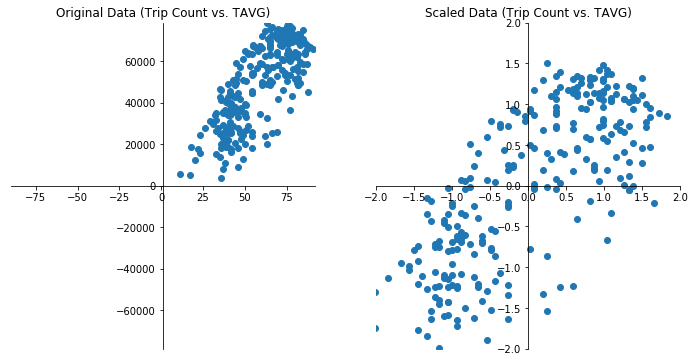

In [89]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data (Trip Count vs. TAVG)")
axes2.set_title("Scaled Data (Trip Count vs. TAVG)")

maxx = X_train_ch["TAVG"].max()
maxy = y_train_ch.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train_ch["TAVG"], y_train_ch)
axes2.scatter(X_train_scaled_ch[:,0], y_train_scaled_ch[:])

plt.savefig("scaled_nyc.png", bbox_inches="tight")